# Autocorrelation of chirped Gaussian pulses
$E(t) = \text{exp}[-(\frac{t}{tg})^2(1 + i A)]\text{exp}(i\omega t)$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad,dblquad

In [2]:

l = 800e-9
tg = 100
w = 2*np.pi*3e8 / l
w *= 1e-15
def E(t,A):    
    return np.exp(-((t/tg)**2)*(1 + 1j*A))*np.exp(-1j*w*t)
    #return np.exp(1j*w*t - 2*np.log(2)*((t/100)**2)*(1+1j*A))

def Ec1(t,tau,A):
    return (1.2*E(t-tau,A) + 1*E(t,A))**2

def Ec2(t,tau,A):
    return Ec1(t,tau,A)*np.conj(Ec1(t,tau,A))

def Fc1(t,tau,A):
    return (1*E(t-tau,A) + 1*E(t,A))**2

def Fc2(t,tau,A):
    return Fc1(t,tau,A)*np.conj(Fc1(t,tau,A))

In [3]:
xmin = -500
xmax = 500
tauArray = np.arange(xmin,xmax,5)

def process():    
    A = 3
    f = np.zeros(len(tauArray))
    g = np.zeros(len(tauArray))
    f1 = np.zeros(len(tauArray))
    for idx,tau in enumerate(tauArray):
        f[idx]=quad(Ec2,-np.inf,np.inf,args=(tau,0))[0]
        g[idx]=quad(Fc2,-np.inf,np.inf,args=(tau,A))[0]
        #f1[idx]=E=quad(Ec2,-np.inf,np.inf,args=(tau,A))[0]
    f = (f - np.min(f))/(f[0]-np.min(f))
    g = (g - np.min(g))/(g[0]-np.min(g))
    return f,g
f,g = process()

C:\Users\Jeremy\Anaconda\lib\site-packages\scipy\integrate\quadpack.py:378: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)


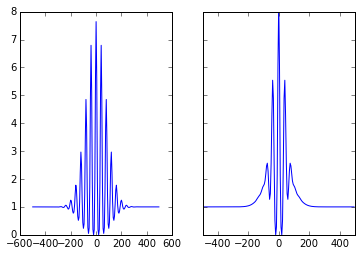

In [4]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
plt.axis([xmin,xmax,0,10])
ax1.plot(tauArray,f)
plt.axis([xmin,xmax,0,8])
ax2.plot(tauArray,g)
plt.show()
plt.close()

#The real and imaginary electric field 

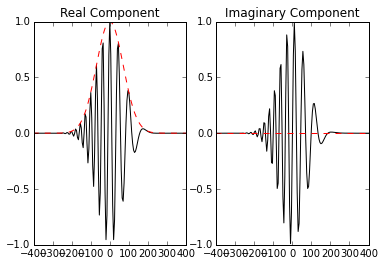

In [5]:
fig = plt.figure()
t = np.arange(-1000,1000,5.0)
tg = 100

fig.add_subplot(121)
plt.title('Real Component')
plt.axis([-400,400,-1,1])
plt.plot(t,np.real(E(t,  3)),lw=1,color='#000000')
plt.plot(t,np.real(np.sqrt(E(t, 3)*np.conj(E(t, 3)))),lw=1,color='#ff0000',ls='dashed')

fig.add_subplot(122)
plt.title('Imaginary Component')
plt.axis([-400,400,-1,1])
plt.plot(t,np.imag(E(t,  3)),lw=1,color='#000000')
plt.plot(t,np.imag(np.sqrt(E(t, 3)*np.conj(E(t,3)))),lw=1,color='#ff0000',ls='dashed')
plt.show()
plt.close()

In [17]:
def I(t):
    #1 + 2*np.exp(-(t/tg)**2)+4*np.exp(-(a**2 + 3*(t/tg)**2)/4.0)*np.cos(a*((t/tg)**2)/2)*np.cos(w*t) + np.exp(-(1+a**2)*(t/tg)**2)*np.cos(2*w*t)
    return 1 + 2*np.exp(-(t/tg)**2)+4*np.exp(-(a**2 + 3*(t/tg)**2)/4.0)*np.cos(a*((t/tg)**2)/2)*np.cos(2*np.pi) + np.exp(-(1+a**2)*(t/tg)**2)*np.cos(2*w*t)

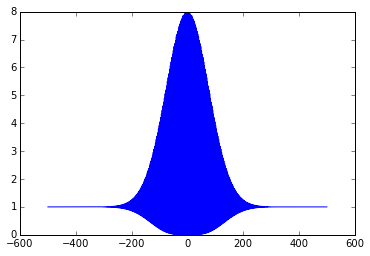

In [15]:
t = np.arange(-500,500,0.1)
a = 0
plt.plot(t,I(t))

In [16]:
tg

100